In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [539]:
# Student data filepath
student_data_path = "data/studentPerformanceFactors_Cleaned.csv"

# Student data dataframe created by reading the CSV with pandas
student_df = pd.read_csv(student_data_path)

#prints number of students
print(f"This data set has {len(student_df)} rows of student data")

This data set has 6377 rows of student data


In [541]:
encoded_df = student_df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Different mapping method for machine learning model
encoded_df['Parental_Involvement'] = le.fit_transform(student_df['Parental_Involvement'])
encoded_df['Access_to_Resources'] = le.fit_transform(student_df['Access_to_Resources'])
encoded_df['Sleep_Hours'] = le.fit_transform(student_df['Sleep_Hours'])
encoded_df['Extracurricular_Activities'] = le.fit_transform(student_df['Extracurricular_Activities'])
encoded_df['Motivation_Level'] = le.fit_transform(student_df['Motivation_Level'])
encoded_df['Internet_Access'] = le.fit_transform(student_df['Internet_Access'])
encoded_df['Family_Income'] = le.fit_transform(student_df['Family_Income'])
encoded_df['Teacher_Quality'] = le.fit_transform(student_df['Teacher_Quality'])
encoded_df['School_Type'] = le.fit_transform(student_df['School_Type'])
encoded_df['Peer_Influence'] = le.fit_transform(student_df['Peer_Influence'])
encoded_df['Learning_Disabilities'] = le.fit_transform(student_df['Learning_Disabilities'])
encoded_df['Parental_Education_Level'] = le.fit_transform(student_df['Parental_Education_Level'])
encoded_df['Distance_from_Home'] = le.fit_transform(student_df['Distance_from_Home'])
encoded_df['Gender'] = le.fit_transform(student_df['Gender'])
encoded_df.head(25)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
0,23,84,1,0,0,3,73,1,1,0,...,2,1,2,3,0,1,2,1,67,-6
1,19,64,1,2,0,4,59,1,1,2,...,2,1,0,4,0,0,1,0,61,2
2,24,98,2,2,1,3,91,2,1,2,...,2,1,1,4,0,2,2,1,74,-17
3,29,89,1,2,1,4,98,2,1,1,...,2,1,0,4,0,1,1,1,71,-27
4,19,92,2,2,1,2,65,2,1,3,...,0,1,1,4,0,0,2,0,70,5
5,19,88,2,2,1,4,89,2,1,3,...,2,1,2,3,0,2,2,1,71,-18
6,29,84,2,1,1,3,68,1,1,1,...,2,0,1,2,0,1,1,1,67,-1
7,25,78,1,0,1,2,50,2,1,1,...,0,1,0,2,0,1,0,1,66,16
8,17,94,2,0,0,2,80,0,1,0,...,1,0,1,1,0,0,2,1,69,-11
9,23,98,2,2,1,4,71,2,1,0,...,0,1,2,5,0,1,1,1,72,1


In [543]:
#Dataframe sorted by Exam scores and creates dataframe filter by exam scores over 90
A_grade_dataframe = student_df[(student_df["Exam_Score"] >= 90)].sort_values(["Exam_Score"], ascending=False)
A_grade_dataframe.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
93,18,89,High,Medium,Yes,4,73,Medium,Yes,3,...,Medium,Private,Positive,2,No,College,Near,Female,100,27
2340,23,83,High,High,Yes,4,89,Low,Yes,1,...,Medium,Public,Negative,3,No,High School,Far,Male,99,10
3454,14,90,High,High,Yes,8,86,Medium,Yes,4,...,Medium,Private,Negative,2,No,High School,Near,Female,99,13
4051,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,...,Medium,Public,Positive,2,No,College,Moderate,Female,98,7
6176,16,83,Low,Medium,Yes,8,92,Low,Yes,2,...,High,Public,Positive,4,No,Postgraduate,Near,Female,98,6
6130,28,96,High,Low,Yes,4,98,High,Yes,1,...,High,Public,Positive,3,No,High School,Near,Male,98,0
5763,25,99,Medium,Medium,Yes,7,77,Medium,Yes,0,...,High,Public,Neutral,3,No,High School,Near,Male,97,20
885,21,74,High,Medium,No,6,94,Medium,Yes,1,...,High,Public,Positive,1,No,High School,Near,Male,97,3
515,15,83,Medium,Medium,No,7,97,Medium,Yes,2,...,High,Private,Neutral,2,No,High School,Near,Female,97,0
3336,18,93,Medium,Medium,No,7,76,Low,Yes,2,...,Medium,Private,Neutral,4,No,High School,Near,Female,96,20


In [545]:
#C
q = encoded_df.quantile([0.00,0.25,0.50,0.75,1.00])
q1 = encoded_df[((encoded_df['Exam_Score']>=q['Exam_Score'][0.00]) & (encoded_df['Exam_Score']<q['Exam_Score'][0.25]))]
q1 = q1.sort_values(["Exam_Score"], ascending=False)
q2 = encoded_df[((encoded_df['Exam_Score']>=q['Exam_Score'][0.25]) & (encoded_df['Exam_Score']<q['Exam_Score'][0.50]))]
q2 = q2.sort_values(["Exam_Score"], ascending=False)
q3 = encoded_df[((encoded_df['Exam_Score']>=q['Exam_Score'][0.50]) & (encoded_df['Exam_Score']<q['Exam_Score'][0.75]))]
q3 = q3.sort_values(["Exam_Score"], ascending=False)
q4 = encoded_df[((encoded_df['Exam_Score']>=q['Exam_Score'][0.75]) & (encoded_df['Exam_Score']<=q['Exam_Score'][1.00]))]
q4 = q4.sort_values(["Exam_Score"], ascending=False)


In [547]:
#Corr Coeff of all students
print(f"Hours_Studied {encoded_df["Exam_Score"].corr(encoded_df["Hours_Studied"])}")
print(f"Attendance {encoded_df["Exam_Score"].corr(encoded_df["Attendance"])}")
print(f"Sleep_Hours {encoded_df["Exam_Score"].corr(encoded_df["Sleep_Hours"])}")
print(f"Parental_Involvement {encoded_df["Exam_Score"].corr(encoded_df["Parental_Involvement"])}")
print(f"Access_to_Resources {encoded_df["Exam_Score"].corr(encoded_df["Access_to_Resources"])}")
print(f"Extracurricular_Activities {encoded_df["Exam_Score"].corr(encoded_df["Extracurricular_Activities"])}")
print(f"Motivation_Level {encoded_df["Exam_Score"].corr(encoded_df["Motivation_Level"])}")
print(f"Internet_Access {encoded_df["Exam_Score"].corr(encoded_df["Internet_Access"])}")
print(f"Tutoring_Sessions {encoded_df["Exam_Score"].corr(encoded_df["Tutoring_Sessions"])}")
print(f"Family_Income {encoded_df["Exam_Score"].corr(encoded_df["Family_Income"])}")
print(f"Teacher_Quality {encoded_df["Exam_Score"].corr(encoded_df["Teacher_Quality"])}")
print(f"School_Type {encoded_df["Exam_Score"].corr(encoded_df["School_Type"])}")
print(f"Peer_Influence {encoded_df["Exam_Score"].corr(encoded_df["Peer_Influence"])}")
print(f"Physical_Activity {encoded_df["Exam_Score"].corr(encoded_df["Physical_Activity"])}")
print(f"Learning_Disabilities {encoded_df["Exam_Score"].corr(encoded_df["Learning_Disabilities"])}")
print(f"Parental_Education_Level {encoded_df["Exam_Score"].corr(encoded_df["Parental_Education_Level"])}")
print(f"Distance_from_Home {encoded_df["Exam_Score"].corr(encoded_df["Distance_from_Home"])}")
print(f"Gender {encoded_df["Exam_Score"].corr(encoded_df["Gender"])}")


encoded_df.head()

Hours_Studied 0.4461739730978629
Attendance 0.5816643103422525
Sleep_Hours -0.01631413001711014
Parental_Involvement -0.09424269222123187
Access_to_Resources -0.0902583068211735
Extracurricular_Activities 0.06231907859262715
Motivation_Level -0.017328395024338732
Internet_Access 0.05621883568721425
Tutoring_Sessions 0.15398584369680882
Family_Income -0.02057285402121521
Teacher_Quality -0.05763639771536052
School_Type -0.011833005389052022
Peer_Influence 0.0982712648509809
Physical_Activity 0.02525955393307201
Learning_Disabilities -0.08394051270810966
Parental_Education_Level 0.040856113344310364
Distance_from_Home 0.0896112479635467
Gender -0.0033693307738402005


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
0,23,84,1,0,0,3,73,1,1,0,...,2,1,2,3,0,1,2,1,67,-6
1,19,64,1,2,0,4,59,1,1,2,...,2,1,0,4,0,0,1,0,61,2
2,24,98,2,2,1,3,91,2,1,2,...,2,1,1,4,0,2,2,1,74,-17
3,29,89,1,2,1,4,98,2,1,1,...,2,1,0,4,0,1,1,1,71,-27
4,19,92,2,2,1,2,65,2,1,3,...,0,1,1,4,0,0,2,0,70,5


In [549]:
#Corr Coeff of Q1
print(f"Hours_Studied {q1["Exam_Score"].corr(q1["Hours_Studied"])}")
print(f"Attendance {q1["Exam_Score"].corr(q1["Attendance"])}")
print(f"Sleep_Hours {q1["Exam_Score"].corr(q1["Sleep_Hours"])}")
print(f"Parental_Involvement {q1["Exam_Score"].corr(q1["Parental_Involvement"])}")
print(f"Access_to_Resources {q1["Exam_Score"].corr(q1["Access_to_Resources"])}")
print(f"Extracurricular_Activities {q1["Exam_Score"].corr(q1["Extracurricular_Activities"])}")
print(f"Motivation_Level {q1["Exam_Score"].corr(q1["Motivation_Level"])}")
print(f"Internet_Access {q1["Exam_Score"].corr(q1["Internet_Access"])}")
print(f"Tutoring_Sessions {q1["Exam_Score"].corr(q1["Tutoring_Sessions"])}")
print(f"Family_Income {q1["Exam_Score"].corr(q1["Family_Income"])}")
print(f"Teacher_Quality {q1["Exam_Score"].corr(q1["Teacher_Quality"])}")
print(f"School_Type {q1["Exam_Score"].corr(q1["School_Type"])}")
print(f"Peer_Influence {q1["Exam_Score"].corr(q1["Peer_Influence"])}")
print(f"Physical_Activity {q1["Exam_Score"].corr(q1["Physical_Activity"])}")
print(f"Learning_Disabilities {q1["Exam_Score"].corr(q1["Learning_Disabilities"])}")
print(f"Parental_Education_Level {q1["Exam_Score"].corr(q1["Parental_Education_Level"])}")
print(f"Distance_from_Home {q1["Exam_Score"].corr(q1["Distance_from_Home"])}")
print(f"Gender {q1["Exam_Score"].corr(q1["Gender"])}")
q1.head()

Hours_Studied 0.39629379345135907
Attendance 0.30599690412965225
Sleep_Hours -0.04010204625894956
Parental_Involvement -0.04441747465973423
Access_to_Resources 0.019941760612451745
Extracurricular_Activities 0.012048847765207723
Motivation_Level -0.013521221436085697
Internet_Access 0.03609059958300133
Tutoring_Sessions 0.11054906620094973
Family_Income -0.012005295325905585
Teacher_Quality -0.04493044906079099
School_Type 0.0015541726345445774
Peer_Influence 0.0435221229418678
Physical_Activity 0.07364767767486519
Learning_Disabilities -0.08560045480108606
Parental_Education_Level 0.02389838260819727
Distance_from_Home 0.07070799225473051
Gender -0.006768536279609381


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
6376,15,67,2,1,1,5,94,2,1,0,...,2,1,2,4,0,2,2,1,64,-30
2768,15,61,0,1,1,5,82,2,1,2,...,0,1,2,2,0,2,2,1,64,-18
2783,16,83,1,1,1,2,61,2,1,0,...,0,1,1,4,0,0,2,1,64,3
2812,25,65,2,1,0,3,94,1,1,1,...,0,1,2,3,0,1,0,1,64,-30
2830,26,62,0,1,1,3,72,1,1,1,...,2,1,1,3,0,0,1,0,64,-8


In [551]:
#Corr Coeff of Q2
print(f"Hours_Studied {q2["Exam_Score"].corr(q2["Hours_Studied"])}")
print(f"Attendance {q2["Exam_Score"].corr(q2["Attendance"])}")
print(f"Sleep_Hours {q2["Exam_Score"].corr(q2["Sleep_Hours"])}")
print(f"Parental_Involvement {q2["Exam_Score"].corr(q2["Parental_Involvement"])}")
print(f"Access_to_Resources {q2["Exam_Score"].corr(q2["Access_to_Resources"])}")
print(f"Extracurricular_Activities {q2["Exam_Score"].corr(q2["Extracurricular_Activities"])}")
print(f"Motivation_Level {q2["Exam_Score"].corr(q2["Motivation_Level"])}")
print(f"Internet_Access {q2["Exam_Score"].corr(q2["Internet_Access"])}")
print(f"Tutoring_Sessions {q2["Exam_Score"].corr(q2["Tutoring_Sessions"])}")
print(f"Family_Income {q2["Exam_Score"].corr(q2["Family_Income"])}")
print(f"Teacher_Quality {q2["Exam_Score"].corr(q2["Teacher_Quality"])}")
print(f"School_Type {q2["Exam_Score"].corr(q2["School_Type"])}")
print(f"Peer_Influence {q2["Exam_Score"].corr(q2["Peer_Influence"])}")
print(f"Physical_Activity {q2["Exam_Score"].corr(q2["Physical_Activity"])}")
print(f"Learning_Disabilities {q2["Exam_Score"].corr(q2["Learning_Disabilities"])}")
print(f"Parental_Education_Level {q2["Exam_Score"].corr(q2["Parental_Education_Level"])}")
print(f"Distance_from_Home {q2["Exam_Score"].corr(q2["Distance_from_Home"])}")
print(f"Gender {q2["Exam_Score"].corr(q2["Gender"])}")
q2.head()

Hours_Studied 0.052268182913472606
Attendance 0.15192249321830845
Sleep_Hours -0.00010233507927985186
Parental_Involvement -0.007245542262238504
Access_to_Resources -0.02295032614796804
Extracurricular_Activities 0.037162499136659165
Motivation_Level -0.015952193807556324
Internet_Access -0.0071447577940279405
Tutoring_Sessions 0.04407001593048995
Family_Income 0.019144242959066114
Teacher_Quality 0.029830234270819406
School_Type -0.013911198309008081
Peer_Influence 0.047531999342974085
Physical_Activity -0.018649508918926472
Learning_Disabilities 0.009594646913365047
Parental_Education_Level -0.004211061997654449
Distance_from_Home 0.0208313741962519
Gender -0.019710637200134374


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
7,25,78,1,0,1,2,50,2,1,1,...,0,1,0,2,0,1,0,1,66,16
2722,8,75,2,2,0,1,92,2,1,5,...,0,1,2,4,0,1,1,1,66,-26
2672,23,67,2,2,1,2,63,0,1,3,...,0,0,1,3,0,1,2,1,66,3
5194,15,91,1,0,1,0,50,0,1,1,...,2,1,1,3,0,1,1,0,66,16
5183,13,79,0,0,0,3,60,2,1,1,...,0,0,1,4,0,0,1,1,66,6


In [553]:
#Corr Coeff of Q3
print(f"Hours_Studied {q3["Exam_Score"].corr(q3["Hours_Studied"])}")
print(f"Attendance {q3["Exam_Score"].corr(q3["Attendance"])}")
print(f"Sleep_Hours {q3["Exam_Score"].corr(q3["Sleep_Hours"])}")
print(f"Parental_Involvement {q3["Exam_Score"].corr(q3["Parental_Involvement"])}")
print(f"Access_to_Resources {q3["Exam_Score"].corr(q3["Access_to_Resources"])}")
print(f"Extracurricular_Activities {q3["Exam_Score"].corr(q3["Extracurricular_Activities"])}")
print(f"Motivation_Level {q3["Exam_Score"].corr(q3["Motivation_Level"])}")
print(f"Internet_Access {q3["Exam_Score"].corr(q3["Internet_Access"])}")
print(f"Tutoring_Sessions {q3["Exam_Score"].corr(q3["Tutoring_Sessions"])}")
print(f"Family_Income {q3["Exam_Score"].corr(q3["Family_Income"])}")
print(f"Teacher_Quality {q3["Exam_Score"].corr(q3["Teacher_Quality"])}")
print(f"School_Type {q3["Exam_Score"].corr(q3["School_Type"])}")
print(f"Peer_Influence {q3["Exam_Score"].corr(q3["Peer_Influence"])}")
print(f"Physical_Activity {q3["Exam_Score"].corr(q3["Physical_Activity"])}")
print(f"Learning_Disabilities {q3["Exam_Score"].corr(q3["Learning_Disabilities"])}")
print(f"Parental_Education_Level {q3["Exam_Score"].corr(q3["Parental_Education_Level"])}")
print(f"Distance_from_Home {q3["Exam_Score"].corr(q3["Distance_from_Home"])}")
print(f"Gender {q3["Exam_Score"].corr(q3["Gender"])}")
q3.head()

Hours_Studied 0.08590645391320706
Attendance 0.11950773762462431
Sleep_Hours 0.00046270431810797424
Parental_Involvement -0.00519437856721091
Access_to_Resources -0.02778023231336002
Extracurricular_Activities -0.00907136481472325
Motivation_Level 0.034442473290186855
Internet_Access -0.002347071099189362
Tutoring_Sessions 0.03072924698135833
Family_Income -0.0009425260039942267
Teacher_Quality -0.011501638387284215
School_Type -0.008971299866439375
Peer_Influence -0.025494766354685953
Physical_Activity -0.017322193367899655
Learning_Disabilities -0.04796980413738748
Parental_Education_Level 0.01142682175336693
Distance_from_Home 0.015026617611908764
Gender -0.04772175923585703


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
6375,10,86,0,0,1,2,91,0,1,2,...,2,0,2,3,0,1,0,0,68,-23
4838,23,79,2,0,0,5,77,2,1,1,...,0,1,1,3,0,1,2,1,68,-9
2638,30,68,2,0,0,3,59,2,1,3,...,2,1,2,3,0,0,1,1,68,9
2641,32,61,0,0,1,3,80,2,1,0,...,2,1,2,4,1,0,1,0,68,-12
2646,22,91,2,2,1,4,64,2,1,1,...,0,1,2,3,1,1,1,1,68,4


In [555]:
#Corr Coeff of Q4
print(f"Hours_Studied {q4["Exam_Score"].corr(q4["Hours_Studied"])}")
print(f"Attendance {q4["Exam_Score"].corr(q4["Attendance"])}")
print(f"Sleep_Hours {q4["Exam_Score"].corr(q4["Sleep_Hours"])}")
print(f"Parental_Involvement {q4["Exam_Score"].corr(q4["Parental_Involvement"])}")
print(f"Access_to_Resources {q4["Exam_Score"].corr(q4["Access_to_Resources"])}")
print(f"Extracurricular_Activities {q4["Exam_Score"].corr(q4["Extracurricular_Activities"])}")
print(f"Motivation_Level {q4["Exam_Score"].corr(q4["Motivation_Level"])}")
print(f"Internet_Access {q4["Exam_Score"].corr(q4["Internet_Access"])}")
print(f"Tutoring_Sessions {q4["Exam_Score"].corr(q4["Tutoring_Sessions"])}")
print(f"Family_Income {q4["Exam_Score"].corr(q4["Family_Income"])}")
print(f"Teacher_Quality {q4["Exam_Score"].corr(q4["Teacher_Quality"])}")
print(f"School_Type {q4["Exam_Score"].corr(q4["School_Type"])}")
print(f"Peer_Influence {q4["Exam_Score"].corr(q4["Peer_Influence"])}")
print(f"Physical_Activity {q4["Exam_Score"].corr(q4["Physical_Activity"])}")
print(f"Learning_Disabilities {q4["Exam_Score"].corr(q4["Learning_Disabilities"])}")
print(f"Parental_Education_Level {q4["Exam_Score"].corr(q4["Parental_Education_Level"])}")
print(f"Distance_from_Home {q4["Exam_Score"].corr(q4["Distance_from_Home"])}")
print(f"Gender {q4["Exam_Score"].corr(q4["Gender"])}")
q4.head()

Hours_Studied 0.12761261799341278
Attendance 0.02354577847511701
Sleep_Hours -0.03329059732917151
Parental_Involvement -0.05144991140690466
Access_to_Resources -0.029989151158609964
Extracurricular_Activities 0.04462099428928943
Motivation_Level -0.032811513124830514
Internet_Access 0.015593649859638356
Tutoring_Sessions 0.035648706283359595
Family_Income -0.004828530902884865
Teacher_Quality -0.01000276764884696
School_Type -0.0062071942964179805
Peer_Influence 0.01647594237461982
Physical_Activity 0.004099970388998209
Learning_Disabilities 0.01944917124061716
Parental_Education_Level 0.0028166432293281686
Distance_from_Home 0.0019250074479864071
Gender -0.03701579806882515


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
93,18,89,0,2,1,0,73,2,1,3,...,2,0,2,2,0,0,2,0,100,27
3454,14,90,0,0,1,4,86,2,1,4,...,2,0,0,2,0,1,2,0,99,13
2340,23,83,0,0,1,0,89,1,1,1,...,2,1,0,3,0,1,0,1,99,10
4051,28,90,1,2,1,5,91,2,1,0,...,2,1,2,2,0,0,1,0,98,7
6130,28,96,0,1,1,0,98,0,1,1,...,0,1,2,3,0,1,2,1,98,0


In [557]:
#Corr Coeff of grade A students
A_grade_ec_dataframe = encoded_df[(encoded_df["Exam_Score"] >= 90)]

print(f"Hours_Studied {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Hours_Studied"])}")
print(f"Attendance {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Attendance"])}")
print(f"Sleep_Hours {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Sleep_Hours"])}")
print(f"Parental_Involvement {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Parental_Involvement"])}")
print(f"Access_to_Resources {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Access_to_Resources"])}")
print(f"Extracurricular_Activities {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Extracurricular_Activities"])}")
print(f"Motivation_Level {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Motivation_Level"])}")
print(f"Internet_Access {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Internet_Access"])}")
print(f"Tutoring_Sessions {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Tutoring_Sessions"])}")
print(f"Family_Income {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Family_Income"])}")
print(f"Teacher_Quality {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Teacher_Quality"])}")
print(f"School_Type {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["School_Type"])}")
print(f"Peer_Influence {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Peer_Influence"])}")
print(f"Physical_Activity {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Physical_Activity"])}")
print(f"Learning_Disabilities {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Learning_Disabilities"])}")
print(f"Parental_Education_Level {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Parental_Education_Level"])}")
print(f"Distance_from_Home {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Distance_from_Home"])}")
print(f"Gender {A_grade_ec_dataframe["Exam_Score"].corr(A_grade_ec_dataframe["Gender"])}")

A_grade_ec_dataframe.head(20)

Hours_Studied -0.05334088562137783
Attendance 0.4168816680587054
Sleep_Hours -0.19753639393463426
Parental_Involvement -0.3852806535982991
Access_to_Resources 0.23168735836324764
Extracurricular_Activities 0.3908859995240631
Motivation_Level 0.12405391296394767
Internet_Access 0.3837646205381243
Tutoring_Sessions 0.13744555685917534
Family_Income -0.09986465201419123
Teacher_Quality -0.17224081394230775
School_Type -0.24151097348212383
Peer_Influence 0.27205393213333634
Physical_Activity -0.34990957264470374
Learning_Disabilities nan
Parental_Education_Level 0.06509759789197254
Distance_from_Home 0.20976987209837775
Gender -0.2150910700181971


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score_Difference
93,18,89,0,2,1,0,73,2,1,3,...,2,0,2,2,0,0,2,0,100,27
515,15,83,2,2,0,3,97,2,1,2,...,0,0,1,2,0,1,2,0,97,0
742,24,96,1,0,0,2,93,2,1,2,...,2,1,1,2,0,1,1,0,94,1
805,29,76,2,2,0,4,96,1,1,2,...,2,1,2,2,0,2,1,1,94,-2
885,21,74,0,2,0,2,94,2,1,1,...,0,1,2,1,0,1,2,1,97,3
1065,31,69,2,2,0,3,52,2,0,2,...,1,1,1,5,0,0,0,1,92,40
2212,21,70,0,0,0,5,66,2,1,1,...,1,1,1,4,0,0,1,1,91,25
2340,23,83,0,0,1,0,89,1,1,1,...,2,1,0,3,0,1,0,1,99,10
3017,19,90,2,0,1,1,90,1,1,0,...,2,1,1,2,0,0,0,0,94,4
3336,18,93,2,2,0,3,76,1,1,2,...,2,0,1,4,0,1,2,0,96,20


In [559]:
#linear regression plot function
def linearRegressionplots(x_values, y_values, x_label="X-axis", y_label="Y-axis", title="Scatter Plot"):

    slope = linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    print(f'The r-value is {rvalue}')
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    return plt

In [561]:
# Create a function to format the autopct with count and percentage
def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))  # Calculate the absolute count
    return f"{absolute} ({pct:.1f}%)"  # Return the formatted string


In [563]:
# Perform ANOVA for each variable by Gender
def perform_anova(data, dependent_var, independent_var='Gender'):
    model = ols(f'{dependent_var} ~ {independent_var}', data=data).fit()
    anova_result = anova_lm(model)
    print(f"ANOVA for {dependent_var}:")
    print(anova_result)

The r-value is 0.5816643103422525


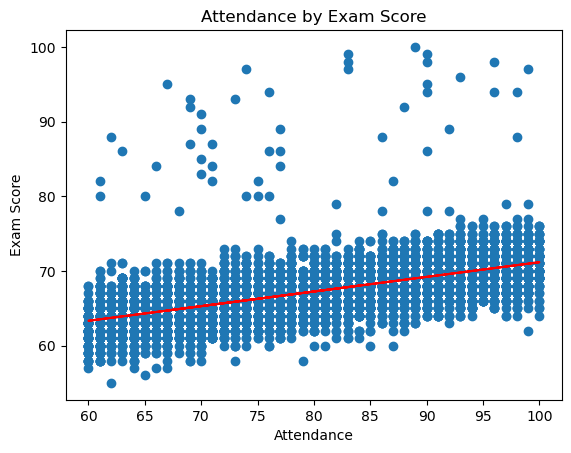

The r-value is 0.4461739730978629


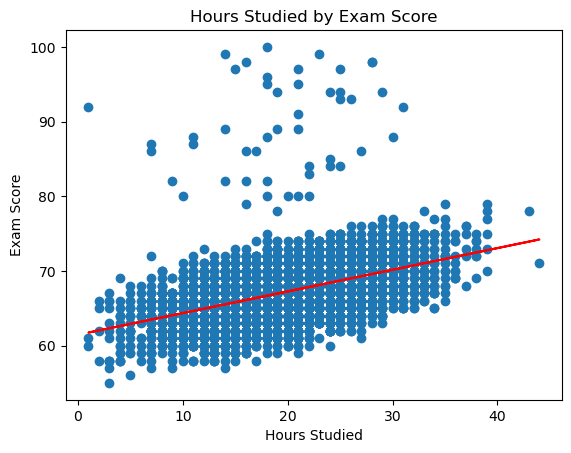

In [565]:
#Q1: What patterns/relationships can be identified between specific factors and Exam_score/Difference for each quartile of exam scores
#A1: The two most positvilty correltating factors of haigher performance
#V1:
fig1 = linearRegressionplots(student_df['Attendance'], student_df['Exam_Score'], "Attendance", "Exam Score", "Attendance by Exam Score")
fig1.savefig('output_data/Fig1.png')

# Show plot
fig1.show()

#V2:
#Scatter plots
#Hours_Studied by exam
fig2 = linearRegressionplots(student_df['Hours_Studied'], student_df['Exam_Score'], "Hours Studied", "Exam Score", "Hours Studied by Exam Score")
fig2.savefig("output_data/Fig2.png")

# Show plot
fig2.show()

In [566]:
# Group the DataFrame by 'Gender' and calculate the mean, median, and quartiles
summary_stats = student_df.groupby('Gender')['Exam_Score'].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the columns for better clarity
summary_stats.columns = ['Mean', 'Median', 'Q1', 'Q3']

# Print the summary statistics
print(summary_stats)

             Mean  Median    Q1    Q3
Gender                               
Female  67.262179    67.0  65.0  69.0
Male    67.235629    67.0  65.0  69.0


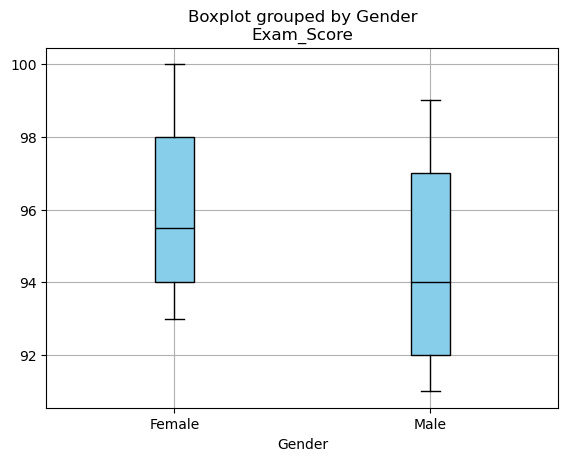

In [569]:
#Q2:Does the ratio of male and female translate to those that have an A grade, or is one gender more successful than the other, despite the ratio
#A2: 
#V1: Number of Girls in >90 compared to number of boys in dataset
fig3 = A_grade_dataframe.boxplot(column='Exam_Score', by='Gender', patch_artist=True,
                          boxprops=dict(facecolor='skyblue', color='black'),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'),
                          flierprops=dict(markerfacecolor='red', marker='o', markersize=8),
                          medianprops=dict(color='black'))

fig3.figure.savefig("output_data/Fig3.png")



#V3:


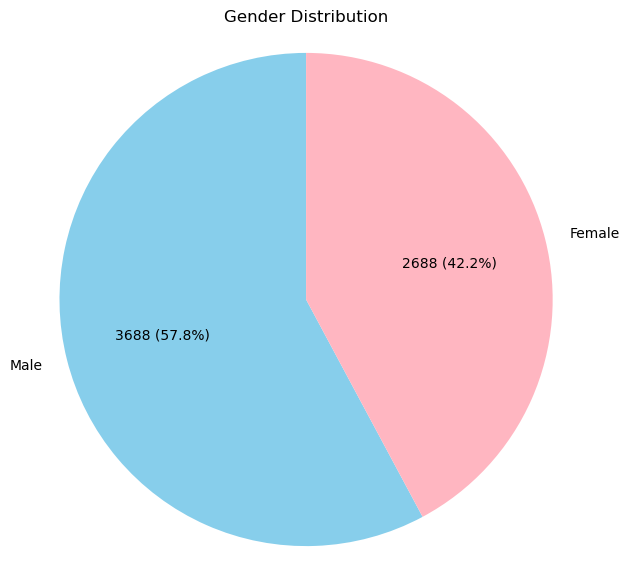

In [571]:
#V2: Pie Chart
# Create the pie chart
gender_counts = student_df['Gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts),
        startangle=90, colors=['skyblue', 'lightpink'])
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Title for the pie chart
plt.title('Gender Distribution')
plt.savefig("output_data/Fig4.png")
# Show the plot
plt.show()

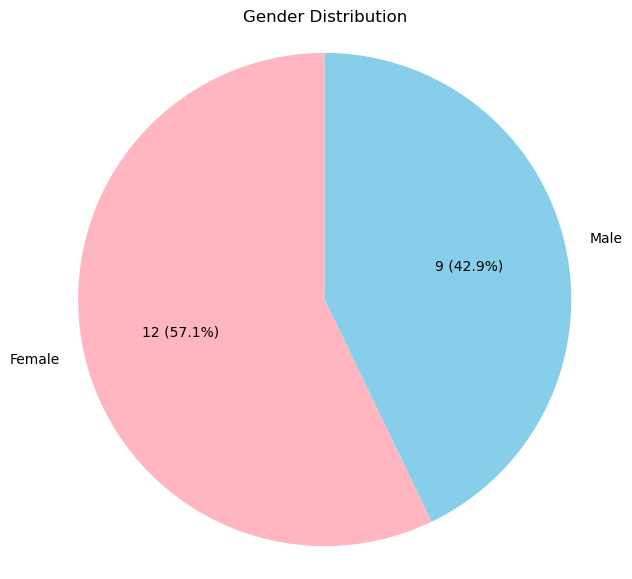

In [573]:
#V3
gender_counts = A_grade_dataframe['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts),
        startangle=90, colors=['lightpink', 'skyblue'])
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Title for the pie chart
plt.title('Gender Distribution')
plt.savefig("output_data/Fig5.png")
# Show the plot
plt.show()

ANOVA for Hours_Studied:
            df      sum_sq    mean_sq         F    PR(>F)
Gender     1.0   32.142857  32.142857  0.713729  0.408721
Residual  19.0  855.666667  45.035088       NaN       NaN
ANOVA for Attendance:
            df       sum_sq     mean_sq         F    PR(>F)
Gender     1.0     2.892857    2.892857  0.025042  0.875933
Residual  19.0  2194.916667  115.521930       NaN       NaN
ANOVA for Sleep_Hours:
            df     sum_sq   mean_sq         F    PR(>F)
Gender     1.0   1.015873  1.015873  0.400263  0.534494
Residual  19.0  48.222222  2.538012       NaN       NaN


<Figure size 800x600 with 0 Axes>

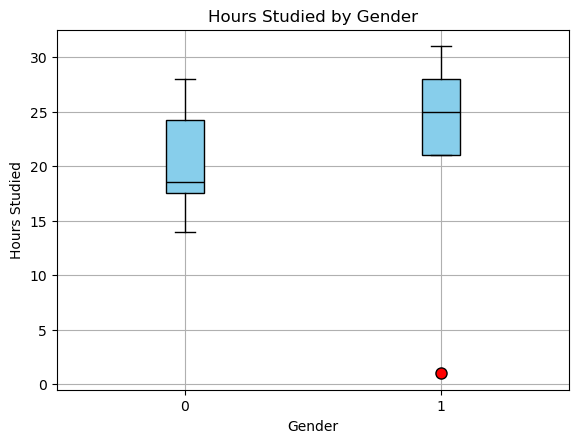

In [581]:
# Perform ANOVA for relevant variables
variables = ['Hours_Studied', 'Attendance', 'Sleep_Hours']
for var in variables:
    perform_anova(A_grade_dataframe, var)
# Example: Boxplot for Hours_Studied by Gender
plt.figure(figsize=(8, 6))
A_grade_ec_dataframe.boxplot(column='Hours_Studied', by='Gender', patch_artist=True,
                          boxprops=dict(facecolor='skyblue', color='black'),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'),
                          flierprops=dict(markerfacecolor='red', marker='o', markersize=8),
                          medianprops=dict(color='black'))
plt.title('Hours Studied by Gender')
plt.suptitle('')  # Removes the default title generated by boxplot
plt.xlabel('Gender')
plt.ylabel('Hours Studied')
plt.savefig("output_data/Fig6_Hours.png")
plt.show()

In [223]:
#Charles Q3: Is there a correlation between the number of hours of sleep per night and attendance? Charles
#linearRegressionplots(A_grade_dataframe["Exam_Score"], A_grade_dataframe["Attendance"], "Exam Score", "Parental Attendance", "Exam Score by Attendance")
#dataframe sorted by Attendance
#Sorted_dataframe = student_df.sort_values(["Attendance"], ascending=False)
#Sorted_dataframe.head(15)
# Show plot


  Parental_Involvement  Motivation_Level_Numeric
0                 High                  1.887800
1                  Low                  1.935659
2               Medium                  1.908643


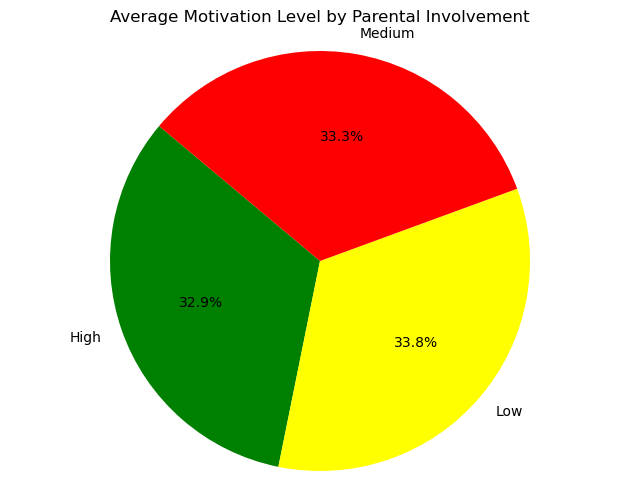

Motivation_Level      Low  Medium  High
Parental_Involvement                   
Low                   354     665   271
Medium                956    1636   659
High                  553     936   347


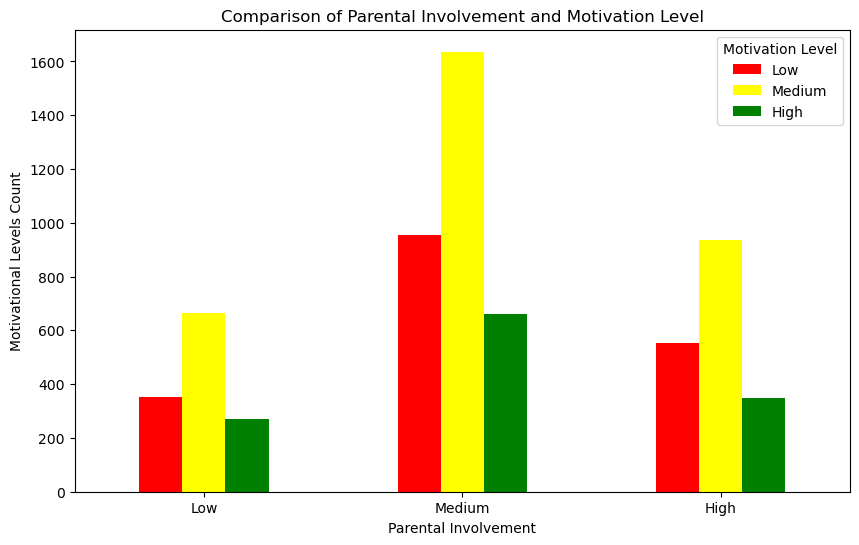

In [519]:
#Question 4 Maryann:
# Convert 'Motivation_Level' to numerical values
motivation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
student_df['Motivation_Level_Numeric'] = student_df['Motivation_Level'].map(motivation_mapping)
# Average Motivation Level based on Parental Involvement
motivation_analysis = student_df.groupby('Parental_Involvement')['Motivation_Level_Numeric'].mean().reset_index()
order = ['Low', 'Medium', 'High']
print(motivation_analysis)

# Prepare data for pie chart
labels = motivation_analysis['Parental_Involvement']
sizes = motivation_analysis['Motivation_Level_Numeric']
colors = ['green', 'yellow', 'red']  # You can choose your colors
# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Motivation Level by Parental Involvement')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("output_data/Fig8.png")
plt.show()

# Contingency table
contingency_table = pd.crosstab(student_df['Parental_Involvement'], student_df['Motivation_Level'])
# Define the custom order for rows and columns
row_order = ['Low', 'Medium', 'High']
column_order = ['Low', 'Medium', 'High']
# Sort the contingency table by the custom order for rows and columns
contingency_table = contingency_table.reindex(index=row_order, fill_value=0)
contingency_table = contingency_table.reindex(columns=column_order, fill_value=0)
# Print the sorted contingency table
print(contingency_table)

# Define colors for each category
color_map = {
    'Low': 'red',
    'Medium': 'yellow',
    'High': 'green'
}
# Create a bar plot
contingency_table.plot(kind='bar', color=[color_map[col] for col in contingency_table.columns], figsize=(10, 6))
# Set the title and labels
plt.title('Comparison of Parental Involvement and Motivation Level')
plt.xlabel('Parental Involvement')
plt.ylabel('Motivational Levels Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
# Show the plot
plt.legend(title='Motivation Level')
plt.savefig("output_data/Fig9.png")
plt.show()